## R을 이용한 텍스트 마이닝
## 백영민 / 한울아카데미



########################################
#제 3부 텍스트 데이터 분석 및 결과제시##
#01 텍스트 데이터에 대한 기술통계분석###
########################################

In [ ]:
# prepare dtm.e

library(stringr)
#공란처리(stripping white space) 과정
mytext <- c("software environment","software  environment","software\tenvironment")
mytext

#단어를 ' '으로 구분해보자. 
str_split(mytext,' ')

#각 오브젝트별 단어수와 문자수를 세보자. 
sapply(str_split(mytext, " "),length)
sapply(str_split(mytext, " "),str_length)

#공란처리과정을 거친 후에 어떻게 되는지 살펴보자. 
mytext.nowhitespace <- str_replace_all(mytext,"[[:space:]]{1,}"," ")
mytext.nowhitespace
#각 오브젝트별 단어수와 문자수를 세보자. 
sapply(str_split(mytext.nowhitespace,' '),length)
sapply(str_split(mytext.nowhitespace,' '),str_length)

#대소문자 통일과정
mytext <- "The 45th President of the United States, Donald Trump, states that he knows how to play trump with the former president"
myword <- unlist(str_extract_all(mytext,boundary("word")))
table(myword)

#Trump 와 States가 고유명사임이 드러나게 _unique_표현을 덧붙였다. 
myword <- str_replace(myword,"Trump","Trump_unique_")
myword <- str_replace(myword,"States","States_unique_")
#대문자를 소문자로 전환한 후 빈도표를 도출했다. 
table(tolower(myword))

mytext <- c("He is one of statisticians agreeing that R is the No. 1 statistical software.","He is one of statisticians agreeing that R is the No. one statistical software.")
str_split(mytext," ")

#숫자자료를 제거하는 방법
mytext2 <- str_split(str_replace_all(mytext,"[[:digit:]]{1,}[[:space:]]{1,}","")," ")
str_c(mytext2[[1]],collapse=" ")
str_c(mytext2[[2]],collapse=" ")

#숫자자료임을 표시하고 수치의 구체적인 내용은 고려하지 않는 방법
mytext3 <- str_split(str_replace_all(mytext,"[[:digit:]]{1,}[[:space:]]{1,}","_number_ ")," ")
str_c(mytext3[[1]],collapse=" ")
str_c(mytext3[[2]],collapse=" ")

mytext <- "Baek et al. (2014) argued that the state of default-setting is critical for people to protect their own personal privacy on the Internet."
#사례로 든 문장에서 al.의 .는 문장구분 표시가 아니다.
str_split(mytext,"\\. ")

#단어들을 살펴보면 다음과 같다. 
str_split(mytext," ")

#default-setting을 두 단어로? 아니면 한단어로? 개인적으로 2단어가 맞다고 봄.
#"성 다음의 et al. (년도)"의 형식을 띨 경우 하나의 단어로 교체.
#단어를 기준으로 분석하기 때문에, 마침표는 없어도 될 듯. 
mytext2 <- str_replace_all(mytext,"-"," ")
mytext2 <- str_replace_all(mytext2,"[[:upper:]]{1}[[:alpha:]]{1,}[[:space:]](et al\\.)[[:space:]]\\([[:digit:]]{4}\\)","_reference_")
mytext2 <- str_replace_all(mytext2,"\\.[[:space:]]{0,}","")
mytext2

mytext <- c("She is an actor","She is the actor")
#다음과 같이 불용단어들의 목록을 오브젝트로 만들어 사용하면 편하다
mystopwords <- "(\\ba )|(\\ban )|(\\bthe )"
str_replace_all(mytext,mystopwords,"")

#tm 라이브러리에 포함된 영어 불용단어 목록들은 두 가지다. 
library('tm')
#짧은 불용단어 목록들에는 총 174개의 단어들이 포함되어 있다. 
length(stopwords("en"))
#긴 불용단어 목록들에는 총 571개의 단어들이 포함되어 있다. 
length(stopwords("SMART"))

#length() 함수표현을 없애면 어떤 단어들이 불용단어 목록에 포함되었는지 알 수 있다. 
stopwords("en")
stopwords("SMART")

#다음과 같은 약식 어근동일화 프로그램을 만들어 보자. 
mystemmer.func <- function(mytextobject,mystemmer,mystemmed){
  mytext <- str_replace_all(mytext,
                            "(\\bam )|(\\bare )|(\\bis )|(\\bwas )|(\\bwere )|(\\bbe )","be ")
  mytext
}

#예시 텍스트 데이터 
mytext <- c("I am a boy. You are a boy. He might be a boy.")
mytext.stem <- mystemmer.func(mytext)
#어근 동일화이전과 이후의 텍스트 데이터의 단어들이 어떻게 다른 빈도표를 갖고 있는지 살펴보자. 
table(str_split(mytext," "))
table(str_split(mytext.stem," "))

#아래의 텍스트 데이터에서는 the/The, United, States가 3회 같은 순서로 제시되고 있다. 
mytext <- "The United States comprises fifty states. In the United States, each state has its own laws. However, federal law overrides state law in the United States."
myword <- unlist(str_extract_all(mytext,boundary("word")))
length(table(myword))
sum(table(myword))
#United, States를 붙어있는 단어, 즉 2-gram, 혹은 bigram이라고 가정하자. 
mytext.2gram <- str_replace_all(mytext,"\\bUnited States","United_States")
myword2 <- unlist(str_extract_all(mytext.2gram,boundary("word")))
length(table(myword2))
sum(table(myword2))
#the/The. United, States를 붙어있는 단어, 즉 3-gram, 혹은 trigram이라고 가정하자. 
mytext.3gram <- str_replace_all(mytext,"\\b(t|T)he United States","The_United_States")
myword3 <- unlist(str_extract_all(mytext.3gram,boundary("word")))
length(table(myword3))
sum(table(myword3))

#tm 라이브러리 구동 
library('tm')
#모아놓은 텍스트 자료의 화일 위치를 설정합니다. 
#2009년부터 2015년까지 백영민의 출간논문 초록의 말뭉치를 구성합니다. 
my.text.location <- "ymbaek_papers"
mypaper  <- VCorpus(DirSource(my.text.location))
#말뭉치를 검토해 봅시다
mypaper
summary(mypaper)

#말뭉치를 구성하는 두 번째 문서는?
mypaper[[2]]

#말뭉치를 구성하는 두 번째 문서의 내용은? 
mypaper[[2]]$content

#말뭉치를 구성하는 두 번째 문서의 메타데이터는? 
mypaper[[2]]$meta

#메타데이터 입력
meta(mypaper[[2]],tag='author') <- 'Y. M. Baek'
meta(mypaper[[2]])

#다음과 방식을 사용하면 특수기호 사용 전후의 단어들이 무엇인지 살펴볼 수 있다.
myfunc <- function(x) {str_extract_all(x,"[[:alnum:]]{1,}[[:punct:]]{1}?[[:alnum:]]{1,}")}
mypuncts <- lapply(mypaper, myfunc)
table(unlist(mypuncts))

#다음과 방식을 사용하면 수치로 표시된 자료가 어떤 것인지 살펴볼 수 있다. 
myfunc <- function(x) {str_extract_all(x,"[[:digit:]]{1,}")}
mydigits <- lapply(mypaper, myfunc)
table(unlist(mydigits))

#다음과 방식을 사용하면 대문자로 시작하는 단어를 확인할 수 있다(고유명사 확인에 유용함)
myfunc <- function(x) {str_extract_all(x,"[[:upper:]]{1}[[:alpha:]]{1,}")}
myuppers <- lapply(mypaper, myfunc)
table(unlist(myuppers))

#우선 숫자표현들을 모두 삭제하였다. 
mycorpus <- tm_map(mypaper, removeNumbers)

#다음으로 특수문자가 들어간 표현들 중 하나의 단어로 취급되어야 하는 것들을 처리하였다.
#removePunctuation의 경우 텍스트 성격을 고려한 아래의 사항들을 반영하지 못한다.
mytempfunc <- function(myobject,oldexp,newexp){
newobject <- tm_map(myobject,
content_transformer(function(x, pattern) gsub(pattern, newexp, x)), oldexp)
newobject
}
mycorpus <- mytempfunc(mycorpus,"-collar","collar")
mycorpus <- mytempfunc(mycorpus,"\\b((c|C)o-)","co")
mycorpus <- mytempfunc(mycorpus,"\\b((c|C)ross-)","cross")
mycorpus <- mytempfunc(mycorpus,"e\\.g\\.","for example")
mycorpus <- mytempfunc(mycorpus,"i\\.e\\.","that is")
mycorpus <- mytempfunc(mycorpus,"\\'s","")
mycorpus <- mytempfunc(mycorpus,"s’","s")
mycorpus <- mytempfunc(mycorpus,"ICD-","ICD")
mycorpus <- mytempfunc(mycorpus,"\\b((i|I)nter-)","inter")
mycorpus <- mytempfunc(mycorpus,"K-pop","Kpop")
mycorpus <- mytempfunc(mycorpus,"\\b((m|M)eta-)","meta")
mycorpus <- mytempfunc(mycorpus,"\\b((o|O)pt-)","opt")
mycorpus <- mytempfunc(mycorpus,"\\b((p|P)ost-)","post")
mycorpus <- mytempfunc(mycorpus,"-end","end")
mycorpus <- mytempfunc(mycorpus,"\\b((w|W)ithin-)","within")
mycorpus <- mytempfunc(mycorpus,"=","is equal to")
mycorpus <- mytempfunc(mycorpus,"and/or","and or")
mycorpus <- mytempfunc(mycorpus,"his/her","his her")
mycorpus <- mytempfunc(mycorpus,"-"," ")

#나머지 특수문자들은 공란으로 처리하여 제거하였다. 
#removePunctuation의 경우 and/oR을 and or로 바꾸지 않고, andor로 바꾸는 등 여기서는 문제가 적지 않다. 
mycorpus <- tm_map(mycorpus, removePunctuation)

#공란처리과정 
mycorpus <- tm_map(mycorpus, stripWhitespace)

#대소문자를 통합하였다. 
mycorpus <- tm_map(mycorpus, content_transformer(tolower))

#불용단어들 삭제(SMART 목록 사용)
mycorpus <- tm_map(mycorpus, removeWords, words=stopwords("SMART"))

#스테밍(어근동일화) 처리하였다. 
mycorpus <- tm_map(mycorpus, stemDocument, language="en")

#우선 문자수와 단어수를 계산하기 위한 개인맞춤형 함수 설정
mycharfunc <- function(x) {str_extract_all(x,".")}
mywordfunc <- function(x) {str_extract_all(x,boundary("word"))}
#사전처리과정 적용이전
mychar <- lapply(mypaper, mycharfunc)
myuniquechar0 <- length(table(unlist(mychar)))
mytotalchar0 <- sum(table(unlist(mychar)))
myword <- lapply(mypaper, mywordfunc)
myuniqueword0 <- length(table(unlist(myword)))
mytotalword0 <- sum(table(unlist(myword)))

#사전처리과정 적용이후
mychar <- lapply(mycorpus, mycharfunc)
myuniquechar1 <- length(table(unlist(mychar)))
mytotalchar1 <- sum(table(unlist(mychar)))
myword <- lapply(mycorpus, mywordfunc)
myuniqueword1 <- length(table(unlist(myword)))
mytotalword1 <- sum(table(unlist(myword)))

#사전처리로 인해 어떻게 변화했는지를 살펴보자. 
results.comparing <- rbind(
  c(myuniquechar0,myuniquechar1),
  c(mytotalchar0,mytotalchar1),
  c(myuniqueword0,myuniqueword1),
  c(mytotalword0,mytotalword1))
colnames(results.comparing) <- c("before","after")
rownames(results.comparing) <- c("고유문자수","총문자수","고유단어수","총단어수")
results.comparing

#이제 문서X단어행렬을 구축하자.
#TermDocumentMatrix를 사용하면 가로줄에는 단어가, 세로줄에는 문서가 배치된다. 
# hygjob2
dtm.e <- DocumentTermMatrix(mycorpus) 
#dtm.e


In [6]:
# prepare dtm.e

library(stringr)
#공란처리(stripping white space) 과정
mytext <- c("software environment","software  environment","software\tenvironment")
mytext

#단어를 ' '으로 구분해보자. 
str_split(mytext,' ')


[1] "software environment"  "software  environment" "software\tenvironment"

[[1]]
[1] "software"    "environment"

[[2]]
[1] "software"    ""            "environment"

[[3]]
[1] "software\tenvironment"

In [10]:
mytext

[1] "software environment"  "software  environment" "software\tenvironment"

In [8]:
#각 오브젝트별 단어수와 문자수를 세보자. 
sapply(str_split(mytext, " "),length)
#sapply(str_split(mytext, " "),str_length)

[1] 2 3 1

In [9]:
sapply(str_split(mytext, " "),str_length)

[[1]]
[1]  8 11

[[2]]
[1]  8  0 11

[[3]]
[1] 20

In [11]:
#공란처리과정을 거친 후에 어떻게 되는지 살펴보자. 
mytext.nowhitespace <- str_replace_all(mytext,"[[:space:]]{1,}"," ")
mytext.nowhitespace

[1] "software environment" "software environment" "software environment"

In [13]:
#각 오브젝트별 단어수와 문자수를 세보자. 
sapply(str_split(mytext.nowhitespace,' '),length)


[1] 2 2 2

In [14]:
sapply(str_split(mytext.nowhitespace,' '),str_length)

8,8,8
11,11,11


In [16]:
#대소문자 통일과정
mytext <- "The 45th President of the United States, \
    Donald Trump, states that he knows how to play trump with the former president"
myword <- unlist(str_extract_all(mytext,boundary("word")))
table(myword)

myword
     45th    Donald    former        he       how     knows        of      play 
        1         1         1         1         1         1         1         1 
president President    states    States      that       the       The        to 
        1         1         1         1         1         2         1         1 
    trump     Trump    United      with 
        1         1         1         1 

In [17]:
#Trump 와 States가 고유명사임이 드러나게 _unique_표현을 덧붙였다. 
myword <- str_replace(myword,"Trump","Trump_unique_")
myword <- str_replace(myword,"States","States_unique_")

In [18]:
#대문자를 소문자로 전환한 후 빈도표를 도출했다. 
table(tolower(myword))


          45th         donald         former             he            how 
             1              1              1              1              1 
         knows             of           play      president         states 
             1              1              1              2              1 
states_unique_           that            the             to          trump 
             1              1              3              1              1 
 trump_unique_         united           with 
             1              1              1 

In [20]:
mytext <- c("He is one of statisticians agreeing that R is the No. 1 statistical software.",
            "He is one of statisticians agreeing that R is the No. one statistical software.")
str_split(mytext," ")

[[1]]
 [1] "He"            "is"            "one"           "of"           
 [5] "statisticians" "agreeing"      "that"          "R"            
 [9] "is"            "the"           "No."           "1"            
[13] "statistical"   "software."    

[[2]]
 [1] "He"            "is"            "one"           "of"           
 [5] "statisticians" "agreeing"      "that"          "R"            
 [9] "is"            "the"           "No."           "one"          
[13] "statistical"   "software."

In [21]:
#숫자자료를 제거하는 방법
mytext2 <- str_split(str_replace_all(mytext,"[[:digit:]]{1,}[[:space:]]{1,}","")," ")
str_c(mytext2[[1]],collapse=" ")
str_c(mytext2[[2]],collapse=" ")

[1] "He is one of statisticians agreeing that R is the No. statistical software."

[1] "He is one of statisticians agreeing that R is the No. one statistical software."

In [22]:
#숫자자료임을 표시하고 수치의 구체적인 내용은 고려하지 않는 방법
mytext3 <- str_split(str_replace_all(mytext,"[[:digit:]]{1,}[[:space:]]{1,}","_number_ ")," ")
str_c(mytext3[[1]],collapse=" ")
str_c(mytext3[[2]],collapse=" ")

[1] "He is one of statisticians agreeing that R is the No. _number_ statistical software."

[1] "He is one of statisticians agreeing that R is the No. one statistical software."

In [23]:
mytext <- "Baek et al. (2014) argued that the state of default-setting is critical for people to protect their own personal privacy on the Internet."
#사례로 든 문장에서 al.의 .는 문장구분 표시가 아니다.
str_split(mytext,"\\. ")

[[1]]
[1] "Baek et al"                                                                                                                   
[2] "(2014) argued that the state of default-setting is critical for people to protect their own personal privacy on the Internet."

In [24]:
#단어들을 살펴보면 다음과 같다. 
str_split(mytext," ")

[[1]]
 [1] "Baek"            "et"              "al."             "(2014)"         
 [5] "argued"          "that"            "the"             "state"          
 [9] "of"              "default-setting" "is"              "critical"       
[13] "for"             "people"          "to"              "protect"        
[17] "their"           "own"             "personal"        "privacy"        
[21] "on"              "the"             "Internet."

In [25]:
#default-setting을 두 단어로? 아니면 한단어로? 개인적으로 2단어가 맞다고 봄.
#"성 다음의 et al. (년도)"의 형식을 띨 경우 하나의 단어로 교체.
#단어를 기준으로 분석하기 때문에, 마침표는 없어도 될 듯. 
mytext2 <- str_replace_all(mytext,"-"," ")
mytext2 <- str_replace_all(mytext2,"[[:upper:]]{1}[[:alpha:]]{1,}[[:space:]](et al\\.)[[:space:]]\\([[:digit:]]{4}\\)","_reference_")
mytext2 <- str_replace_all(mytext2,"\\.[[:space:]]{0,}","")
mytext2

[1] "_reference_ argued that the state of default setting is critical for people to protect their own personal privacy on the Internet"

In [26]:
mytext <- c("She is an actor","She is the actor")
#다음과 같이 불용단어들의 목록을 오브젝트로 만들어 사용하면 편하다
mystopwords <- "(\\ba )|(\\ban )|(\\bthe )"
str_replace_all(mytext,mystopwords,"")

[1] "She is actor" "She is actor"

In [27]:
#tm 라이브러리에 포함된 영어 불용단어 목록들은 두 가지다. 
library('tm')
#짧은 불용단어 목록들에는 총 174개의 단어들이 포함되어 있다. 
length(stopwords("en"))
#긴 불용단어 목록들에는 총 571개의 단어들이 포함되어 있다. 
length(stopwords("SMART"))

[1] 174

[1] 571

In [ ]:
#length() 함수표현을 없애면 어떤 단어들이 불용단어 목록에 포함되었는지 알 수 있다. 
stopwords("en")
stopwords("SMART")

In [29]:
#다음과 같은 약식 어근동일화 프로그램을 만들어 보자. 
mystemmer.func <- function(mytextobject,mystemmer,mystemmed){
  mytext <- str_replace_all(mytext,
                            "(\\bam )|(\\bare )|(\\bis )|(\\bwas )|(\\bwere )|(\\bbe )","be ")
  mytext
}

In [30]:
#예시 텍스트 데이터 
mytext <- c("I am a boy. You are a boy. He might be a boy.")
mytext.stem <- mystemmer.func(mytext)
#어근 동일화이전과 이후의 텍스트 데이터의 단어들이 어떻게 다른 빈도표를 갖고 있는지 살펴보자. 
table(str_split(mytext," "))
table(str_split(mytext.stem," "))


    a    am   are    be  boy.    He     I might   You 
    3     1     1     1     3     1     1     1     1 


    a    be  boy.    He     I might   You 
    3     3     3     1     1     1     1 

In [31]:
#아래의 텍스트 데이터에서는 the/The, United, States가 3회 같은 순서로 제시되고 있다. 
mytext <- "The United States comprises fifty states. In the United States, each state has its own laws. However, federal law overrides state law in the United States."
myword <- unlist(str_extract_all(mytext,boundary("word")))
length(table(myword))
sum(table(myword))

[1] 19

[1] 26

In [32]:
#United, States를 붙어있는 단어, 즉 2-gram, 혹은 bigram이라고 가정하자. 
mytext.2gram <- str_replace_all(mytext,"\\bUnited States","United_States")
myword2 <- unlist(str_extract_all(mytext.2gram,boundary("word")))
length(table(myword2))
sum(table(myword2))

[1] 18

[1] 23

In [33]:
#the/The. United, States를 붙어있는 단어, 즉 3-gram, 혹은 trigram이라고 가정하자. 
mytext.3gram <- str_replace_all(mytext,"\\b(t|T)he United States","The_United_States")
myword3 <- unlist(str_extract_all(mytext.3gram,boundary("word")))
length(table(myword3))
sum(table(myword3))

[1] 16

[1] 20

In [34]:
#tm 라이브러리 구동 
library('tm')
#모아놓은 텍스트 자료의 화일 위치를 설정합니다. 
#2009년부터 2015년까지 백영민의 출간논문 초록의 말뭉치를 구성합니다. 
my.text.location <- "ymbaek_papers"
mypaper  <- VCorpus(DirSource(my.text.location))
#말뭉치를 검토해 봅시다
mypaper
summary(mypaper)

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 24

           Length Class             Mode
p2009a.txt 2      PlainTextDocument list
p2009b.txt 2      PlainTextDocument list
p2010a.txt 2      PlainTextDocument list
p2010b.txt 2      PlainTextDocument list
p2010c.txt 2      PlainTextDocument list
p2011a.txt 2      PlainTextDocument list
p2011b.txt 2      PlainTextDocument list
p2012a.txt 2      PlainTextDocument list
p2012b.txt 2      PlainTextDocument list
p2013a.txt 2      PlainTextDocument list
p2014a.txt 2      PlainTextDocument list
p2014b.txt 2      PlainTextDocument list
p2014c.txt 2      PlainTextDocument list
p2014d.txt 2      PlainTextDocument list
p2014e.txt 2      PlainTextDocument list
p2014f.txt 2      PlainTextDocument list
p2014g.txt 2      PlainTextDocument list
p2014h.txt 2      PlainTextDocument list
p2014i.txt 2      PlainTextDocument list
p2014k.txt 2      PlainTextDocument list
p2015a.txt 2      PlainTextDocument list
p2015b.txt 2      PlainTextDocument list
p2015c.txt 2      PlainTextDocument list
p2015d.txt 2    

In [35]:
#말뭉치를 구성하는 두 번째 문서는?
mypaper[[2]]

<<PlainTextDocument>>
Metadata:  7
Content:  chars: 990

In [36]:
#말뭉치를 구성하는 두 번째 문서의 내용은? 
mypaper[[2]]$content

[1] "The debate on late night comedy has been inconclusive, with some scholars arguing that this genre increases political knowledge, and others seeing late night comedy as harmful to effective citizenry. We add to the debate and to the research on media effects more generally, by proposing a model that measures political knowledge. The model utilizes item response theory (IRT) to account for individual characteristics, knowledge item difficulty, and response format that influences the likelihood of providing a correct response. Drawing on the 2004 National Annenberg Election Study, we employ this model to test knowledge gain from late night comedy. Using a meta-analysis across 35 political knowledge items, we show that late night comedy increases knowledge, but primarily on easy political items that have fewer correct response options, and mainly among the inattentive citizens. We discuss theoretical implications and provide practical suggestions for scholarship on media effects."

In [37]:
#말뭉치를 구성하는 두 번째 문서의 메타데이터는? 
mypaper[[2]]$meta

  author       : character(0)
  datetimestamp: 2019-05-06 12:37:50
  description  : character(0)
  heading      : character(0)
  id           : p2009b.txt
  language     : en
  origin       : character(0)

In [38]:
#메타데이터 입력
meta(mypaper[[2]],tag='author') <- 'Y. M. Baek'
meta(mypaper[[2]])

  author       : Y. M. Baek
  datetimestamp: 2019-05-06 12:37:50
  description  : character(0)
  heading      : character(0)
  id           : p2009b.txt
  language     : en
  origin       : character(0)

In [39]:
#다음과 방식을 사용하면 특수기호 사용 전후의 단어들이 무엇인지 살펴볼 수 있다.
myfunc <- function(x) {str_extract_all(x,"[[:alnum:]]{1,}[[:punct:]]{1}?[[:alnum:]]{1,}")}
mypuncts <- lapply(mypaper, myfunc)
table(unlist(mypuncts))

Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; c


             and/or  anxious-ambivalent         blue-collar       co-activation 
                  2                   1                   1                   1 
      co-constraint        co-emergence        co-existence     content-analyze 
                  1                   1                   1                   1 
     cross-cultural    cross-culturally         cross-party    culture-specific 
                  6                   1                   1                   1 
        data-driven dismissive-avoidant                 e.g       export/import 
                  1                   1                   3                   1 
       eye-oriented             face-to    fearful-avoidant    five-dimensional 
                  1                   6                   1                   1 
          follow-up         Gudykunst's             his/her          Hofstede's 
                  3                   1                   1                   2 
                i.e        

In [40]:
#다음과 방식을 사용하면 수치로 표시된 자료가 어떤 것인지 살펴볼 수 있다. 
myfunc <- function(x) {str_extract_all(x,"[[:digit:]]{1,}")}
mydigits <- lapply(mypaper, myfunc)
table(unlist(mydigits))

Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; c


   0    1   11 1973    2 2002 2003 2004 2007 2008 2012 2028    3   35    4  712 
   1   35    1    1    9    1    1    1    1    2    2    1    7    1    2    1 
 756   78   82    9 
   1    1    1    1 

In [41]:
#다음과 방식을 사용하면 대문자로 시작하는 단어를 확인할 수 있다(고유명사 확인에 유용함)
myfunc <- function(x) {str_extract_all(x,"[[:upper:]]{1}[[:alpha:]]{1,}")}
myuppers <- lapply(mypaper, myfunc)
table(unlist(myuppers))

Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; c


     Abstract        Action  Additionally     Affective   Affirmative 
            1             1             1             3             1 
      African          AIMS      Although   Ambivalence      American 
            1             1             2             1             1 
    Americans            An           AND         Anger     Annenberg 
            2             1             1             1             1 
  Application Approximately           Are            As        Asians 
            1             1             1             1             1 
           At    BACKGROUND          Bank        Barack         Based 
            1             1             1             1             5 
       Benoit         Black          Both            By   CONCLUSIONS 
            1             4             1             5             1 
          CVC          Data    Democratic     Democrats    Depression 
            1             1             1             4             2 
     

In [42]:
#우선 숫자표현들을 모두 삭제하였다. 
mycorpus <- tm_map(mypaper, removeNumbers)

In [43]:
#다음으로 특수문자가 들어간 표현들 중 하나의 단어로 취급되어야 하는 것들을 처리하였다.
#removePunctuation의 경우 텍스트 성격을 고려한 아래의 사항들을 반영하지 못한다.
mytempfunc <- function(myobject,oldexp,newexp){
newobject <- tm_map(myobject,
content_transformer(function(x, pattern) gsub(pattern, newexp, x)), oldexp)
newobject
}
mycorpus <- mytempfunc(mycorpus,"-collar","collar")
mycorpus <- mytempfunc(mycorpus,"\\b((c|C)o-)","co")
mycorpus <- mytempfunc(mycorpus,"\\b((c|C)ross-)","cross")
mycorpus <- mytempfunc(mycorpus,"e\\.g\\.","for example")
mycorpus <- mytempfunc(mycorpus,"i\\.e\\.","that is")
mycorpus <- mytempfunc(mycorpus,"\\'s","")
mycorpus <- mytempfunc(mycorpus,"s’","s")
mycorpus <- mytempfunc(mycorpus,"ICD-","ICD")
mycorpus <- mytempfunc(mycorpus,"\\b((i|I)nter-)","inter")
mycorpus <- mytempfunc(mycorpus,"K-pop","Kpop")
mycorpus <- mytempfunc(mycorpus,"\\b((m|M)eta-)","meta")
mycorpus <- mytempfunc(mycorpus,"\\b((o|O)pt-)","opt")
mycorpus <- mytempfunc(mycorpus,"\\b((p|P)ost-)","post")
mycorpus <- mytempfunc(mycorpus,"-end","end")
mycorpus <- mytempfunc(mycorpus,"\\b((w|W)ithin-)","within")
mycorpus <- mytempfunc(mycorpus,"=","is equal to")
mycorpus <- mytempfunc(mycorpus,"and/or","and or")
mycorpus <- mytempfunc(mycorpus,"his/her","his her")
mycorpus <- mytempfunc(mycorpus,"-"," ")

In [44]:
#나머지 특수문자들은 공란으로 처리하여 제거하였다. 
#removePunctuation의 경우 and/oR을 and or로 바꾸지 않고, andor로 바꾸는 등 여기서는 문제가 적지 않다. 
mycorpus <- tm_map(mycorpus, removePunctuation)

In [45]:
#공란처리과정 
mycorpus <- tm_map(mycorpus, stripWhitespace)

In [46]:
#대소문자를 통합하였다. 
mycorpus <- tm_map(mycorpus, content_transformer(tolower))

In [47]:
#불용단어들 삭제(SMART 목록 사용)
mycorpus <- tm_map(mycorpus, removeWords, words=stopwords("SMART"))

In [48]:
#스테밍(어근동일화) 처리하였다. 
mycorpus <- tm_map(mycorpus, stemDocument, language="en")

In [49]:
#우선 문자수와 단어수를 계산하기 위한 개인맞춤형 함수 설정
mycharfunc <- function(x) {str_extract_all(x,".")}
mywordfunc <- function(x) {str_extract_all(x,boundary("word"))}

In [50]:
#사전처리과정 적용이전
mychar <- lapply(mypaper, mycharfunc)
myuniquechar0 <- length(table(unlist(mychar)))
mytotalchar0 <- sum(table(unlist(mychar)))
myword <- lapply(mypaper, mywordfunc)
myuniqueword0 <- length(table(unlist(myword)))
mytotalword0 <- sum(table(unlist(myword)))

Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; c

In [51]:
#사전처리과정 적용이후
mychar <- lapply(mycorpus, mycharfunc)
myuniquechar1 <- length(table(unlist(mychar)))
mytotalchar1 <- sum(table(unlist(mychar)))
myword <- lapply(mycorpus, mywordfunc)
myuniqueword1 <- length(table(unlist(myword)))
mytotalword1 <- sum(table(unlist(myword)))

Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; c

In [52]:
#사전처리로 인해 어떻게 변화했는지를 살펴보자. 
results.comparing <- rbind(
  c(myuniquechar0,myuniquechar1),
  c(mytotalchar0,mytotalchar1),
  c(myuniqueword0,myuniqueword1),
  c(mytotalword0,mytotalword1))
colnames(results.comparing) <- c("before","after")
rownames(results.comparing) <- c("고유문자수","총문자수","고유단어수","총단어수")
results.comparing

,before,after
고유문자수,77,27
총문자수,24940,14605
고유단어수,1155,687
총단어수,3556,2045


In [53]:
#이제 문서X단어행렬을 구축하자.
#TermDocumentMatrix를 사용하면 가로줄에는 단어가, 세로줄에는 문서가 배치된다. 
# hygjob2
dtm.e <- DocumentTermMatrix(mycorpus) 

## 지금까지 dtm.e를 구하는 과정이었다. 
## 3부 01 - 텍스트 데이터에 대한 기술통계분석를 시작하자

In [54]:
#tm 라이브러리 함수를 설명했던 dtm.e 오브젝트를 사용할 것이다. 
#먼저 단어의 발현빈도를 구해보자. 
word.freq <- apply(dtm.e[,],2,sum)
#아래와 같은 형식의 벡터가 구성되어 있고, 총 단어수는 678로 나타났다. 
head(word.freq)
length(word.freq)

aaebuycottingaaf      aaeoptinaaf     aaeoptoutaaf          abnotic 
               1                1                1                1 
        abstract           academ 
               1                1

[1] 686

In [58]:
word

function (string, start = 1L, end = start, sep = fixed(" ")) 
{
    n <- max(length(string), length(start), length(end))
    string <- rep(string, length.out = n)
    start <- rep(start, length.out = n)
    end <- rep(end, length.out = n)
    breaks <- str_locate_all(string, sep)
    words <- lapply(breaks, invert_match)
    len <- vapply(words, nrow, integer(1))
    neg_start <- !is.na(start) & start < 0L
    start[neg_start] <- start[neg_start] + len[neg_start] + 1L
    neg_end <- !is.na(end) & end < 0L
    end[neg_end] <- end[neg_end] + len[neg_end] + 1L
    start[start > len] <- NA
    end[end > len] <- NA
    starts <- mapply(function(word, loc) word[loc, "start"], 
        words, start)
    ends <- mapply(function(word, loc) word[loc, "end"], words, 
        end)
    str_sub(string, starts, ends)
}
<bytecode: 0x52a3ae8>
<environment: namespace:stringr>

In [62]:
#빈도가 높은 것부터 낮은 것으로 정렬하자. 
sort.word.freq <- sort(word.freq,decreasing=TRUE)
sort.word.freq[1:20]

studi        polit       effect        onlin       cultur         find 
          45           35           27           27           26           24 
         sns       social      privaci     influenc        model       examin 
          23           22           19           16           16           15 
relationship       survey         poll       korean         user      discuss 
          15           15           14           13           13           12 
        face       implic 
          12           12

In [65]:
#다음과 같이 하면 누적빈도를 계산할 수 있다. 
cumsum.word.freq <- cumsum(sort.word.freq)
cumsum.word.freq[1:20]

studi        polit       effect        onlin       cultur         find 
          45           80          107          134          160          184 
         sns       social      privaci     influenc        model       examin 
         207          229          248          264          280          295 
relationship       survey         poll       korean         user      discuss 
         310          325          339          352          365          377 
        face       implic 
         389          401

In [66]:
#다음과 같이 하면 전체합이 1이 되는 비율을 계산할 수 있다. 
prop.word.freq <- cumsum.word.freq/cumsum.word.freq[length(cumsum.word.freq)]
prop.word.freq[1:20]

studi        polit       effect        onlin       cultur         find 
  0.02201566   0.03913894   0.05234834   0.06555773   0.07827789   0.09001957 
         sns       social      privaci     influenc        model       examin 
  0.10127202   0.11203523   0.12133072   0.12915851   0.13698630   0.14432485 
relationship       survey         poll       korean         user      discuss 
  0.15166341   0.15900196   0.16585127   0.17221135   0.17857143   0.18444227 
        face       implic 
  0.19031311   0.19618395

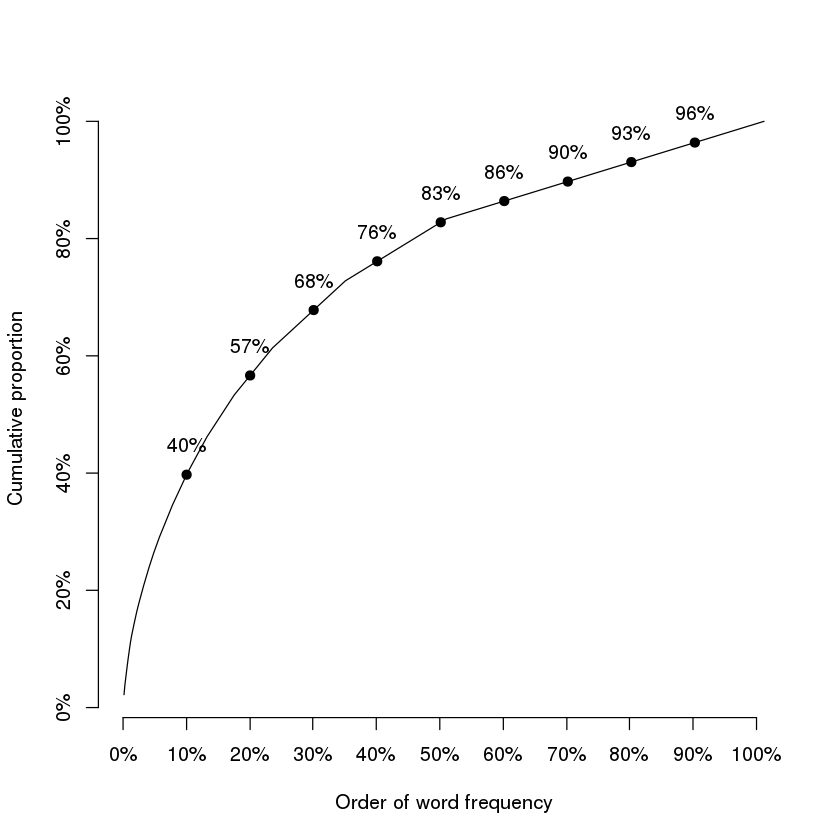

In [67]:
#단어빈도에 대한 간단한 분석  
plot(1:length(word.freq),prop.word.freq,type='l',
     xlab='Order of word frequency',ylab='Cumulative proportion',
     main="",axes=FALSE)
axis(1,at=round(67.8*(0:10)),labels=paste(10*(0:10),"%",sep=""))
axis(2,at=0.20*(0:5),labels=paste(20*(0:5),"%",sep=""))
for (i in 1:9) {
  text(6.8*10*i,0.05+prop.word.freq[6.8*10*i],
       labels=paste(round(100*prop.word.freq[6.8*10*i]),"%",sep=""))
  points(6.8*10*i,prop.word.freq[6.8*10*i],pch=19)
}

Loading required package: RColorBrewer


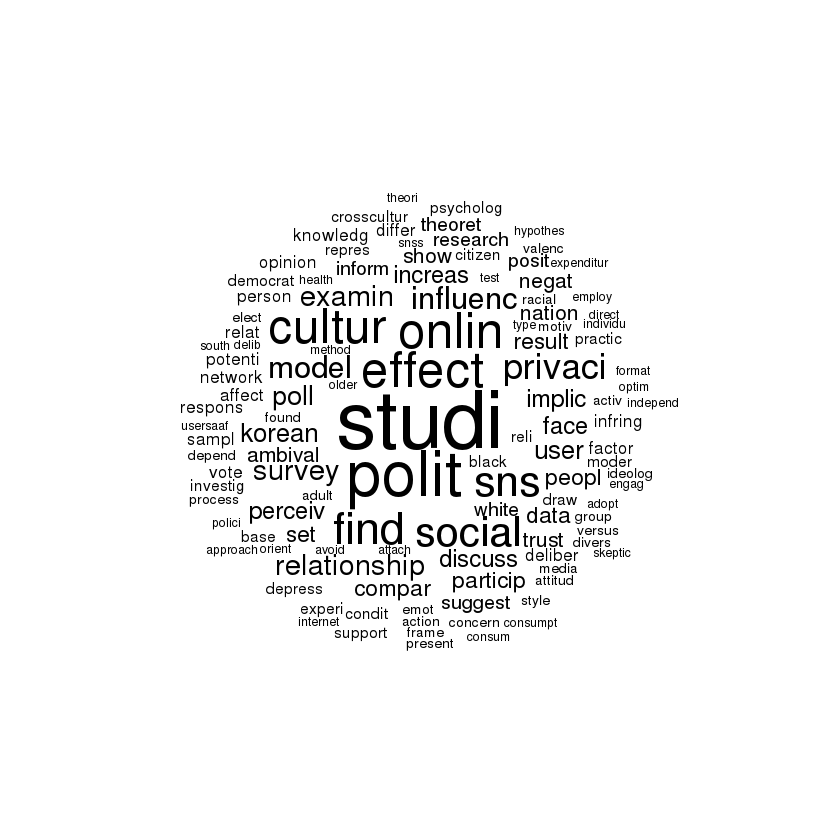

In [68]:
#wordcloud 라이브러리 구동 
library('wordcloud')
wordcloud(names(word.freq),freq=word.freq,scale=c(4,0.2),
          rot.per=0.0,min.freq=5,random.order=FALSE)

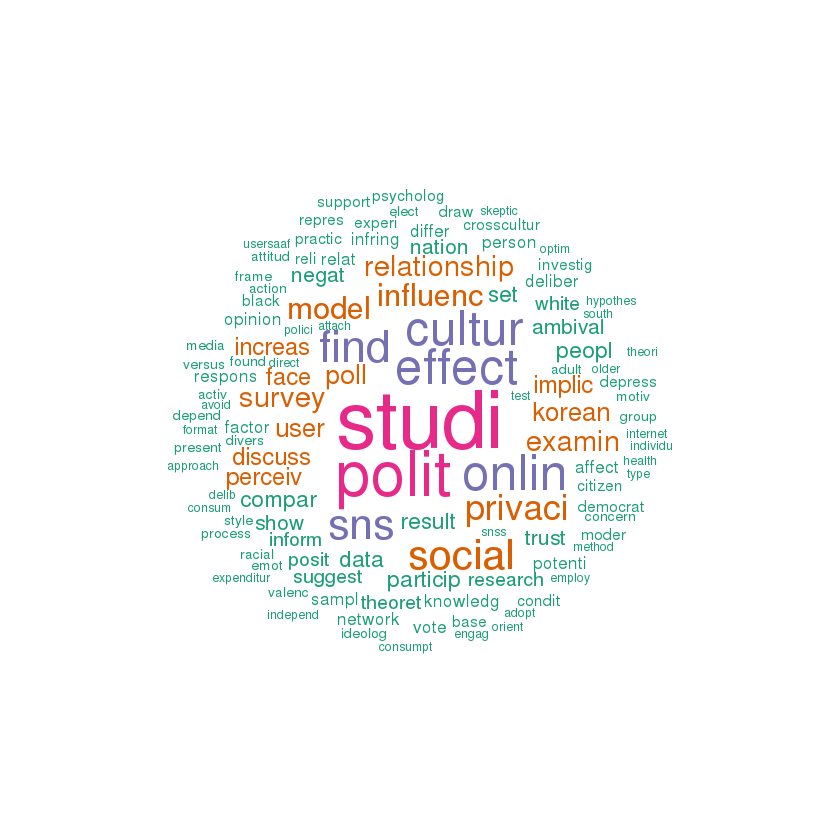

In [69]:
#색조를 넣으려면 RColorBrewer 라이브러리를 추가로 구동
library('RColorBrewer') 
#어떤 색이 가능한지는 다음을 실행하세요: display.brewer.all()
pal <- brewer.pal(4, "Dark2")
wordcloud(names(word.freq),freq=word.freq,scale=c(4,0.2),
          rot.per=0.0,min.freq=5,random.order=FALSE,col=pal)

In [71]:
##############################
# dtm.k 구하기
##############################

#R을 이용한 한국어 자연어처리
library('KoNLP')
library('tm')
library('stringr')
#자바의 문제가 있을 수 있으며, 문제발생시 자신의 PC 사양에 맞는 자바를 설치하고 재실행. 

#2016년까지 출간된 저자의 한국어 논문들의 말뭉치를 구성하였다.
mytextlocation <- "ymbaek_nonmun"
mypaper <- VCorpus(DirSource(mytextlocation))
mypaper

#우선 가장 최근 논문초록을 대상으로 한국어 자연어 처리를 진행해 보자. 
mykorean <- mypaper[[19]]$content
mykorean

#간단한 사전처리를 실시하여 봅시다. 
#영문표현들은 모두 삭제하였다(한국어 분석이기 때문에)
mytext <- str_replace_all(mykorean, "[[:lower:]]","")
#괄호를 삭제하였다. 
mytext <- str_replace_all(mytext, "\\(","")
mytext <- str_replace_all(mytext, "\\)","")
#따옴표를 삭제하였다. 
mytext <- str_replace_all(mytext, "‘","")
mytext <- str_replace_all(mytext, "’","")
#가운뎃점을 삭제하였다. 
mytext <- str_replace_all(mytext, " · ",", ")
mytext

#의미의 핵심이라고 할 수 있는 명사를 추출하였다. 
noun.mytext <- extractNoun(mytext)
noun.mytext
#명사들의 빈도 분석을 해보자. 
table(noun.mytext)

#한국어 말뭉치 텍스트 데이터 분석 
#숫자표현은 어떤 것들이 사용되었는지 확인 
mydigits <- lapply(mypaper, function(x) (str_extract_all(x, "[[:digit:]]{1,}")))
table(unlist(mydigits))
#특수기호는 어떤 것들이 사용되었고, 그 전후의 표현은 어떤가?
mypuncts <- lapply(mypaper, function(x) (str_extract_all(x, "\\b[[:alpha:]]{1,}[[:punct:]]{1,}[[:alpha:]]{1,}\\b")))
table(unlist(mypuncts))

#숫자표현들 모두 삭제 
mycorpus <- tm_map(mypaper, removeNumbers)

#지정된 표현들 교체
mytempfunct <- function(myobject, oldexp, newexp) {
  newobject <- tm_map(myobject,
                      content_transformer(function(x,pattern) gsub(pattern,newexp,x)), oldexp)
  newobject 
}
#특수기호들 처리 
mycorpus <- mytempfunct(mycorpus, "[[:lower:]]","")
mycorpus <- mytempfunct(mycorpus, "[[:upper:]]","")
mycorpus <- mytempfunct(mycorpus, "\\("," ")
mycorpus <- mytempfunct(mycorpus, "\\)"," ")
mycorpus <- mytempfunct(mycorpus, "‘"," ")
mycorpus <- mytempfunct(mycorpus, "’"," ")
mycorpus <- mytempfunct(mycorpus, " · ",", ")
mycorpus <- mytempfunct(mycorpus, "·",", ")
mycorpus <- mytempfunct(mycorpus, "ㆍ",", ")
mycorpus <- mytempfunct(mycorpus, "/","")
mycorpus <- mytempfunct(mycorpus, "-","")
mycorpus <- mytempfunct(mycorpus, "－","")
mycorpus <- mytempfunct(mycorpus, "\\?"," ")

#공란 처리 
mycorpus <- tm_map(mycorpus, stripWhitespace)

#명사 추출 후 문서를 명사들의 나열로 바꾸어주는 개인맞춤 함수 
myNounFun <- function(mytext){
  myNounList <- paste(extractNoun(mytext),collapse='  ')
  myNounList
}

myNounCorpus <- mycorpus 
for (i in 1:length(mycorpus)) {
  myNounCorpus[[i]]$content <- myNounFun(mycorpus[[i]]$content)
}

#전체 말뭉치 단어를 확인해 보자. 
table(unlist(lapply(myNounCorpus,function(x) str_extract_all(x,boundary("word")))))

#추출된 단어들중 몇몇은 문제들을 발견할 수 있다. 
#예를 들면 포퓰리즘, 포퓰리즘과, 포퓰리즘에 등이 모두 개별단어로 처리되어 있다. 
#추가적인 작업을 통해 이런 표현들을 정리하는 것도 괜찮지만, 양이 많을 경우 노력이 많이 소요된다. 
#몇개만 실시해 보자. 
temp <- myNounCorpus
for (i in 1:length(myNounCorpus)) {
  myNounCorpus[[i]]$content <- str_replace_all(temp[[i]]$content,"포퓰리즘[[:alpha:]]{1,}","포퓰리즘")
  myNounCorpus[[i]]$content <- str_replace_all(temp[[i]]$content,"커뮤니케이션[[:alpha:]]{1,}","커뮤니케이션")
  myNounCorpus[[i]]$content <- str_replace_all(temp[[i]]$content,"참여[[:alpha:]]{1,}","참가")  
  myNounCorpus[[i]]$content <- str_replace_all(temp[[i]]$content,"참가[[:alpha:]]{1,}","참가") 
  myNounCorpus[[i]]$content <- str_replace_all(temp[[i]]$content,"위키리크스[[:alpha:]]{1,}","위키리크스") 
}
#DTM을 구축
dtm.k <- DocumentTermMatrix(myNounCorpus)
dtm.k
colnames(dtm.k[,])

Checking user defined dictionary!



<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 19

[1] "본 논문의 목적은 언론학 교육과정(curriculum) 개선논의의 등장배경과 역사를 서술하고 그 필요성과 방향성을 제시하는 것이다. 본 논문에서는 컴퓨터 프로그래밍 언어와 데이터 수집 · 관리 · 분석 · 재현과 같은 데이터 과학관련 지식과 기술의 필요성을 강조하며 이를 언론학의 교과과정에 첨가 · 융합해야 한다는 주장의 등장배경과 필요성을 전반적으로 개괄 · 소개하였다. 또한 제도주의(institutionalism) 이론에 근거하여 언론학 교과과정을 ‘제도(institution)’로 파악하였으며, 제도를 둘러싼 이해관계자들로 ‘교수진’, ‘학생’, ‘학부모를 비롯한 일반인’, ‘다른 학문분과들’을 논의하였다. 이를 통해 기존의 교과과정과 새로운 교과과정이 특정 집단내부 혹은 집단 간 갈등을 일으킬 수 있으며, 이러한 갈등을 최소화시키고 협력가능성을 증대시킬 수 있는 방안을 추상적 수준에서나마 제안해 보았다."

[1] "본 논문의 목적은 언론학 교육과정 개선논의의 등장배경과 역사를 서술하고 그 필요성과 방향성을 제시하는 것이다. 본 논문에서는 컴퓨터 프로그래밍 언어와 데이터 수집, 관리, 분석, 재현과 같은 데이터 과학관련 지식과 기술의 필요성을 강조하며 이를 언론학의 교과과정에 첨가, 융합해야 한다는 주장의 등장배경과 필요성을 전반적으로 개괄, 소개하였다. 또한 제도주의 이론에 근거하여 언론학 교과과정을 제도로 파악하였으며, 제도를 둘러싼 이해관계자들로 교수진, 학생, 학부모를 비롯한 일반인, 다른 학문분과들을 논의하였다. 이를 통해 기존의 교과과정과 새로운 교과과정이 특정 집단내부 혹은 집단 간 갈등을 일으킬 수 있으며, 이러한 갈등을 최소화시키고 협력가능성을 증대시킬 수 있는 방안을 추상적 수준에서나마 제안해 보았다."

[1] "논문"       "목적"       "언론학"     "교육과정"   "개선"      
 [6] "논의"       "등장"       "배경"       "역사"       "서술"      
[11] "필요"       "성"         "방향"       "성"         "시하"      
[16] "것"         "논문"       "컴퓨터"     "프로그래밍" "언어"      
[21] "데이터"     "수집"       "관리"       "분석"       "재현"      
[26] "데이터"     "과학"       "관련"       "지식"       "기술"      
[31] "필요"       "성"         "강조"       "이"         "언론학"    
[36] "교과과정"   "첨"         "융합"       "주장"       "등장"      
[41] "배경"       "필요"       "성"         "전반"       "적"        
[46] "개괄"       "소개"       "제도"       "주의"       "이론"      
[51] "근거"       "언론학"     "교과과정"   "제도"       "파악"      
[56] "제도"       "이해관계자" "들"         "교수진"     "학생"      
[61] "학부모"     "비롯"       "한"         "일반"       "학문분과"  
[66] "들"         "논의"       "이"         "기존"       "교과과정"  
[71] "교과과정"   "특정"       "집단"       "내부"       "집단"      
[76] "등"         "수"         "등"         "최소"       "화시"      
[81] "키"         "협력가능성" "증대"       "수"         "방안"      
[86] "추상"       "적"         "수준"       "제안"       "해"

noun.mytext
      강조       개괄       개선         것       과학       관련       관리 
         1          1          1          1          1          1          1 
  교과과정     교수진   교육과정       근거       기술       기존       내부 
         4          1          1          1          1          1          1 
      논문       논의     데이터         들         등       등장       목적 
         2          2          2          2          2          2          1 
      방안       방향       배경       분석       비롯       서술         성 
         1          1          2          1          1          1          4 
      소개         수       수준       수집       시하     언론학       언어 
         1          2          1          1          1          3          1 
      역사       융합         이       이론 이해관계자       일반       재현 
         1          1          2          1          1          1          1 
        적       전반       제도       제안       주의       주장       증대 
         2          1          3          1          1          1          

Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; c


 080    1   10  120   16   18 1977 1981    2 2000 2001 2004 2006 2010 2013 2015 
   1    5    2    1    1    1    1    1    3    1    2    1    2    1    1    2 
  21   23   25    3   30  300    4    5    7  863 
   1    1    2    2    1    1    1    2    1    1 

Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; c


               account)을           action)이론들을               Consumer)의 
                        1                         1                         1 
         consumption)하는                 effect)를           Performing-arts 
                        1                         1                         1 
             가치지향’은          감시견’으로서의              감염자’라는 
                        2                         1                         1 
                  경우)의           관계유지’(기존        관계형성’(SNS에서 
                        1                         1                         1 
      관계회복’(끊어졌던          광고·기업태도를          광고·기업태도에 
                        1                         1                         1 
      교육과정(curriculum                  국민’을                기업－공익 
                        1                         1                         6 
                 노출’이            대등적－일방적             대등적-협력적 
                        1                         1                      

Warning message in stri_extract_all_boundaries(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_boundaries(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_boundaries(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_boundaries(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_boundaries(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_boundaries(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_boundaries(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”Warning message in stri_extract_all_boundaries(string, pattern, simplify = simplify


                       1                        2                        3 
                       1                        1                        1 
                       4                        5                        6 
                       1                        1                        1 
                       7                       價                     가구 
                       1                        1                        4 
                    가능                   가능성                 가부장적 
                       1                        1                        1 
                    가상                     가설                     가중 
                       2                        7                        1 
                  가중치                     가지                     가치 
                       2                       11                        6 
                  가치관                 가치지향                     각각 
                       1                     

<<DocumentTermMatrix (documents: 19, terms: 193)>>
Non-/sparse entries: 238/3429
Sparsity           : 94%
Maximal term length: 12
Weighting          : term frequency (tf)

[1] "가능성"                   "가부장적"                
  [3] "가중치"                   "가치관"                  
  [5] "가치지향"                 "감염자"                  
  [7] "강도가어떠한"             "개별화"                  
  [9] "개선방안"                 "건강정보"                
 [11] "건강증진"                 "고위공직자"              
 [13] "공공성"                   "공동체"                  
 [15] "공동체적"                 "공연예술"                
 [17] "공익성"                   "관료제"                  
 [19] "교과과정"                 "교수진"                  
 [21] "교육과정"                 "국내외"                  
 [23] "권위주의"                 "규정하"                  
 [25] "기고자"                   "기존연구"                
 [27] "남북경협"                 "냉소주의"                
 [29] "네트워크"                 "노스탤지어적인"          
 [31] "다집단"                   "단순화"                  
 [33] "대등적일방적"             "대등적협력적"            
 [35] "대상자"                   "대외비"                  
 [37] "대용량"                   "대표성"                  
 [39] "대형병원"                 "데이터"                  
 [41] "도시공동체"               "동기와"                  
 [43] "동질성"                   "디리쉴레분포"            
 [45] "라디오"                   "兩價感情"                
 [47] "레토릭"                   "리더쉽"                  
 [49] "마케팅"                   "만족감"                  
 [51] "말하기"                   "매개과정"                
 [53] "매개변수"                 "메르스"                  
 [55] "문화예술"                 "미국과"                  
 [57] "미국대사관"               "미디어"                  
 [59] "민주주의"                 "방법론"                  
 [61] "방송사"                   "배타적"                  
 [63] "보수주의자"               "부여방법인성향가중방법과"
 [65] "북한관련"                 "불일치"                  
 [67] "사람들"                   "사회학"                  
 [69] "상업성"                   "상호작용"                
 [71] "서베이"                   "서베이를"                
 [73] "서울시"                   "서울시민"                
 [75] "선행연구"                 "선호도"                  
 [77] "설문조사"                 "소비자"                  
 [79] "시청자"                   "식도락"                  
 [81] "신도시"                   "신뢰도"                  
 [83] "신뢰성"                   "신문사"                  
 [85] "실용성"                   "실천이론"                
 [87] "실험결과"                 "실험연구"                
 [89] "실험조건"                 "어려움"                  
 [91] "언론학"                   "엘리트"                  
 [93] "여론조사"                 "역사학"                  
 [95] "연구자"                   "연령별"                  
 [97] "영상미"                   "예술계"                  
 [99] "온라인"                   "온오프라인"              
[101] "외교전"                   "위키리크스"              
[103] "유의미하게"               "유의미한"                
[105] "유형별"                   "으로서"                  
[107] "응답자"                   "이념성향"                
[109] "이론과"                   "이방인"                  
[111] "이야깃거리"               "이어지는가를"            
[113] "이용자"                   "이용행태"                
[115] "이해관계자"               "인간관계"                
[117] "인력자원"                 "인식하"                  
[119] "인지이론"                 "인터넷"                  
[121] "인터넷을"                 "인터뷰"                  
[123] "일방적상호적"             "있는가에"                
[125] "자율성"                   "잘못된"                  
[127] "잠재력"                   "재검토"                  
[129] "재구성"                   "저널리즘"                
[131] "적용사례"                 "전문가"                  
[133] "정권교체"                 "정당화"                  
[135] "정반대"                   "정책연구"                
[137] "정치인"                   "정치학"                  
[139] "제시하였"                 "조사방법"                
[141] "조직문화"                 "조직적활동이며"          
[143] "조직화"                   "주도하"                  
[145] "주성분"                   "주재국대사관본국간"      
[147] "주한미군"                 "중도주의자"              
[149] "지상파"                   "지역공동체"              
[151] "진보주의자"               "참가자"                  
[153] "참여자

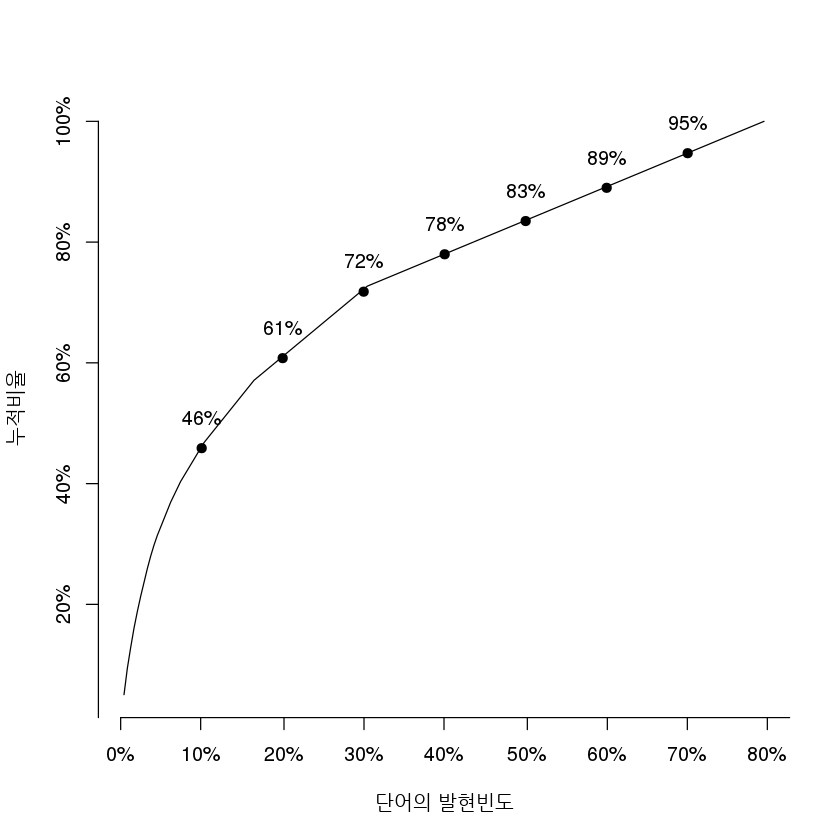

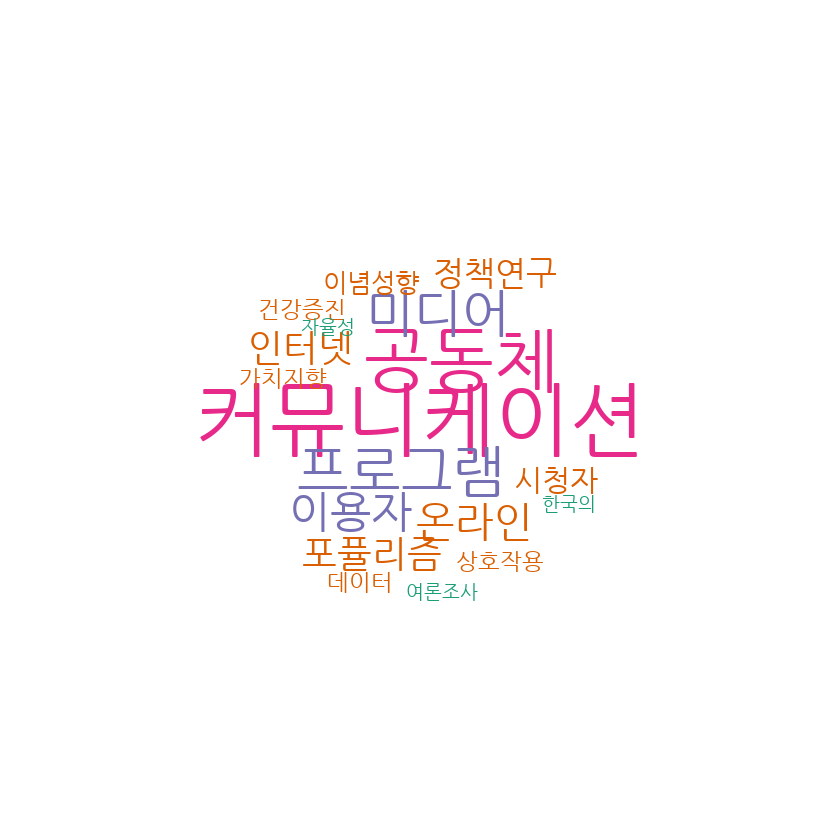

In [72]:
#이제는 한국어 학술논문들의 말뭉치를 분석해 보자. 
#동일한 과정을 밟았다. 
word.freq <- apply(dtm.k[,],2,sum)
sort.word.freq <- sort(word.freq,decreasing=TRUE)
cumsum.word.freq <- cumsum(sort.word.freq)
#다음과 같이 하면 전체합이 1이 되는 비율을 계산할 수 있다. 
prop.word.freq <- cumsum.word.freq/cumsum.word.freq[length(cumsum.word.freq)]
#단어빈도에 대한 간단한 분석  
plot(1:length(word.freq),prop.word.freq,type='l',
     xlab='단어의 발현빈도',ylab='누적비율',
     main="",axes=FALSE)
axis(1,at=round(24.3*(0:10)),labels=paste(10*(0:10),"%",sep=""))
axis(2,at=0.20*(0:5),labels=paste(20*(0:5),"%",sep=""))
for (i in 1:9) {
  text(2.43*10*i,0.05+prop.word.freq[2.43*10*i],
       labels=paste(round(100*prop.word.freq[2.43*10*i]),"%",sep=""))
  points(2.43*10*i,prop.word.freq[2.43*10*i],pch=19)
}

pal <- brewer.pal(4, "Dark2")
wordcloud(names(word.freq),freq=word.freq,scale=c(4,0.05),
          rot.per=0.0,min.freq=5,random.order=FALSE,col=pal)

In [73]:
#findAssocs 함수를 사용하면 DTM, TDM에 등장하는 단어가 지정된 수치를 이상인 값으로 연관된 단어들 목록을 알 수 있다. 
#즉 아래는 dtm.e라는 DTM에 속한 polit라는 단어와 .50이상의 상관관계를 갖는 단어들의 목록을 구하는 방법이다. 
findAssocs(dtm.e,"polit",0.50)

$polit
aaebuycottingaaf           academ           agenda           boycot 
            0.73             0.73             0.73             0.73 
         boycott          buycott         consumer        demograph 
            0.73             0.73             0.73             0.73 
       discredit         interest         lifestyl          possess 
            0.73             0.73             0.73             0.73 
      postmateri            socio        underscor            civic 
            0.73             0.73             0.73             0.68 
           emerg         particip       background             issu 
            0.68             0.65             0.61             0.61 
         generat           consum           measur         democrat 
            0.56             0.55             0.55             0.53

In [74]:
#findAssocs는 사실 피어슨 상관계수다. 예를 들어 polit와 agenda 두 단어의 상관계수를 구해보자. 
var1 <- as.vector(dtm.e[,"polit"])
var2 <- as.vector(dtm.e[,"agenda"])
cor.test(var1,var2)


	Pearson's product-moment correlation

data:  var1 and var2
t = 4.9693, df = 22, p-value = 5.675e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4582569 0.8741715
sample estimates:
      cor 
0.7272202 


In [75]:
#위와 같은 과정을 개인맞춤형 함수로 지정해 보자. 
my.assoc.func <- function(mydtm,term1,term2){
  myvar1 <- as.vector(mydtm[,term1])
  myvar2 <- as.vector(mydtm[,term2])
  cor.test(myvar1,myvar2)
}

In [76]:
#동일한 결과를 얻을 수 있다. 
my.assoc.func(dtm.e,"polit","agenda")


	Pearson's product-moment correlation

data:  myvar1 and myvar2
t = 4.9693, df = 22, p-value = 5.675e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4582569 0.8741715
sample estimates:
      cor 
0.7272202 


In [77]:
#DTM을 TDM으로 전치시킨 후 문서와 문서의 상관계수도 구할 수 있다. 
my.assoc.func(t(dtm.e),"p2014a.txt","p2014f.txt")


	Pearson's product-moment correlation

data:  myvar1 and myvar2
t = 11.573, df = 684, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3400907 0.4654036
sample estimates:
     cor 
0.404645 


In [78]:
#아래와 같이 문서와 문서의 상관계수 행렬을 계산할 수도 있다. 
length.doc <- length(rownames(dtm.e))
my.doc.cor <- matrix(NA,nrow=length.doc,ncol=length.doc)
for (i in 1:length.doc) {
  for (j in 1:length.doc) {
    my.doc.cor[i,j] <- my.assoc.func(t(dtm.e),rownames(dtm.e)[i],rownames(dtm.e)[j])$est
  }
}
rownames(my.doc.cor) <- colnames(my.doc.cor) <- rownames(dtm.e)

In [79]:
#상관계수 행렬의 일부만 살펴보자. 
round(my.doc.cor[1:4,1:4],2)

,p2009a.txt,p2009b.txt,p2010a.txt,p2010b.txt
p2009a.txt,1.00,0.08,0.20,-0.04
p2009b.txt,0.08,1.00,0.12,0.04
p2010a.txt,0.20,0.12,1.00,0.00
p2010b.txt,-0.04,0.04,0.00,1.00


In [80]:
#예를 들어 첫번째 문서, 즉 p2009a.txt는 다른 문서들과 어떤 상관관계를 갖는지 살펴볼 수 있다. 
round(my.doc.cor[,1],2)

p2009a.txt p2009b.txt p2010a.txt p2010b.txt p2010c.txt p2011a.txt p2011b.txt 
      1.00       0.08       0.20      -0.04       0.04       0.05      -0.05 
p2012a.txt p2012b.txt p2013a.txt p2014a.txt p2014b.txt p2014c.txt p2014d.txt 
      0.51       0.04       0.00       0.11       0.02       0.00       0.05 
p2014e.txt p2014f.txt p2014g.txt p2014h.txt p2014i.txt p2014k.txt p2015a.txt 
      0.06       0.03       0.01       0.08       0.05       0.12       0.03 
p2015b.txt p2015c.txt p2015d.txt 
      0.04       0.06       0.01

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.045511  0.008282  0.037820  0.062494  0.083207  0.511300 

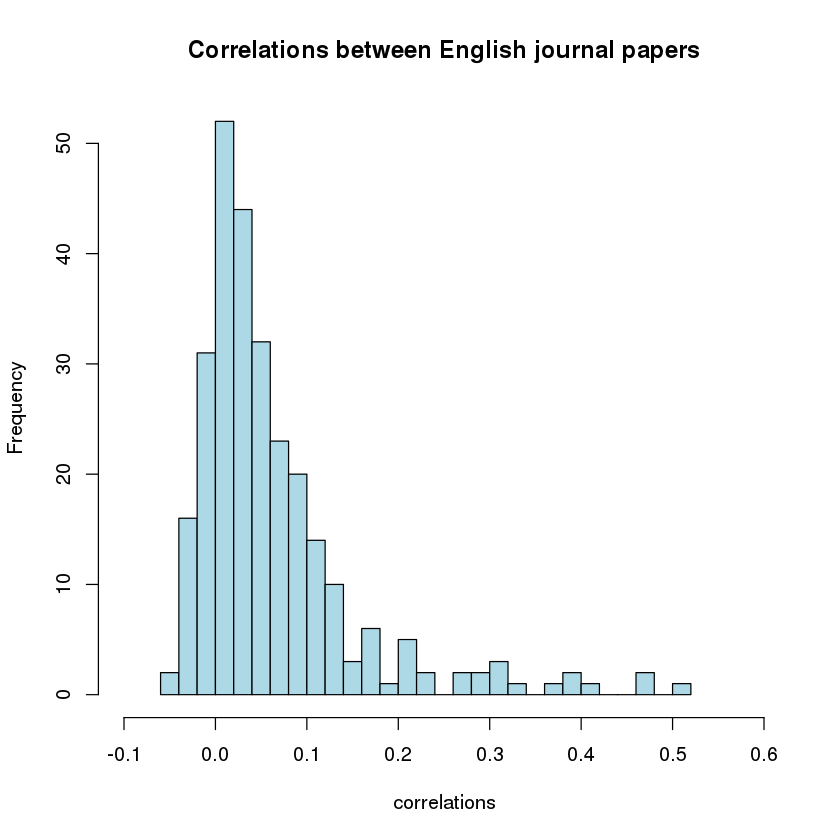

In [81]:
#아래와 같은 방법으로 문서간 상관계수의 히스토그램을 살펴보자. 
hist(my.doc.cor[lower.tri(my.doc.cor)],breaks=30,
     col='lightblue',xlim=c(-0.1,0.6),xlab="correlations",
     main="Correlations between English journal papers")
summary(my.doc.cor[lower.tri(my.doc.cor)])

In [82]:
#위의 상관계수 행렬을 이용해 EFA나 PCA를 실시하는 것도 가능하다. 
factanal(factors=5,covmat=my.doc.cor,rotation="promax")


Call:
factanal(factors = 5, covmat = my.doc.cor, rotation = "promax")

Uniquenesses:
p2009a.txt p2009b.txt p2010a.txt p2010b.txt p2010c.txt p2011a.txt p2011b.txt 
     0.670      0.900      0.747      0.964      0.576      0.819      0.998 
p2012a.txt p2012b.txt p2013a.txt p2014a.txt p2014b.txt p2014c.txt p2014d.txt 
     0.205      0.975      0.208      0.625      0.690      0.994      0.481 
p2014e.txt p2014f.txt p2014g.txt p2014h.txt p2014i.txt p2014k.txt p2015a.txt 
     0.894      0.691      0.793      0.734      0.988      0.720      0.301 
p2015b.txt p2015c.txt p2015d.txt 
     0.942      0.970      0.682 

Loadings:
           Factor1 Factor2 Factor3 Factor4 Factor5
p2009a.txt                                  0.578 
p2009b.txt                  0.338                 
p2010a.txt                  0.384  -0.102   0.264 
p2010b.txt                  0.135                 
p2010c.txt                  0.673                 
p2011a.txt                  0.453  -0.113         
p2011b.txt

In [83]:
#한국어 학술논문 말뭉치에 대해서도 문서간 유사도를 계산해보자. 
#영어 학술논문 말뭉치를 분석한 경우와 동일한 과정을 밟았다. 
length.doc <- length(rownames(dtm.k))
my.doc.cor <- matrix(NA,nrow=length.doc,ncol=length.doc)
for (i in 1:length.doc) {
  for (j in 1:length.doc) {
    my.doc.cor[i,j] <- my.assoc.func(t(dtm.k),rownames(dtm.k)[i],rownames(dtm.k)[j])$est
  }
}
rownames(my.doc.cor) <- colnames(my.doc.cor) <- rownames(dtm.k)

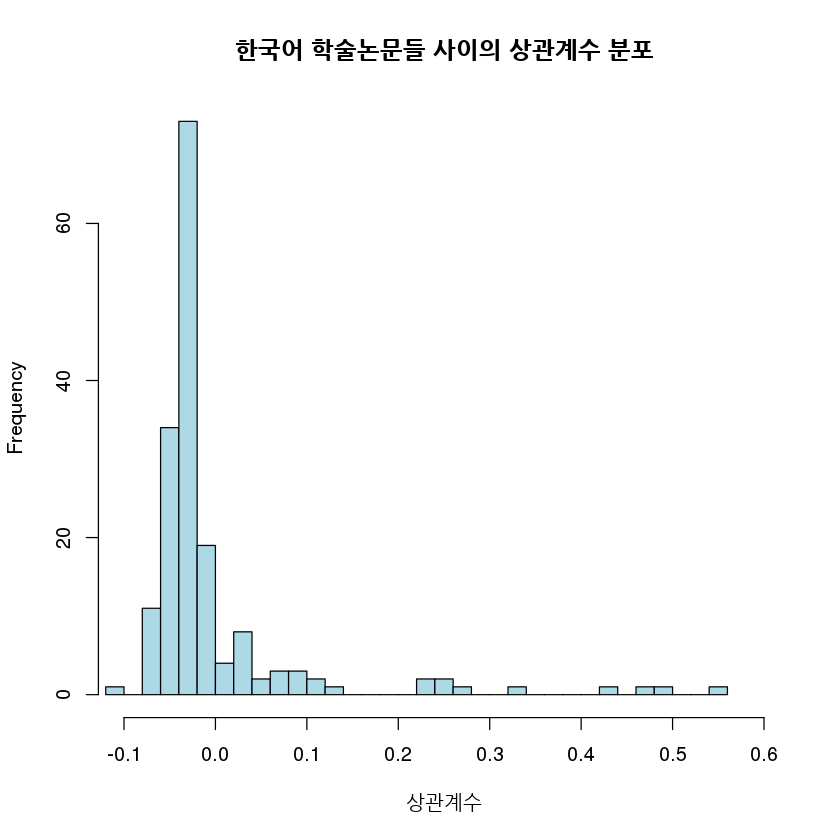

In [84]:
#상관계수의 히스토그램은 다음과 같다. 
hist(my.doc.cor[lower.tri(my.doc.cor)],breaks=30,
     col='lightblue',xlim=c(-0.1,0.6),xlab="상관계수",
     main="한국어 학술논문들 사이의 상관계수 분포")

In [85]:
#이번에는 가장 마지막 문서인 p2015d.txt 다른 문서들과 맺고 있는 상관관계를 살펴보았다. 
round(my.doc.cor[,nrow(my.doc.cor)],2)
summary(my.doc.cor[lower.tri(my.doc.cor)])

up2004a.txt up2005a.txt up2005b.txt up2012a.txt up2012b.txt up2013a.txt 
      -0.04       -0.03       -0.06        0.02       -0.02       -0.05 
up2013b.txt up2014a.txt up2014b.txt up2014c.txt up2014d.txt up2016a.txt 
      -0.04       -0.01       -0.03       -0.04        0.00       -0.04 
up2016b.txt up2016c.txt up2016d.txt up2016e.txt up2016f.txt up2016g.txt 
      -0.03        0.00       -0.01       -0.03       -0.03       -0.04 
up2016h.txt 
       1.00

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.102812 -0.040421 -0.028838 -0.001476 -0.015769  0.543449 

In [86]:
#마찬가지로 위의 상관계수 행렬을 이용해 EFA나 PCA를 실시하는 것도 가능하다. 
#하지만 별도로 제시하지는 않았다. 

In [87]:
#발현단어빈도에 기반하여 문서들의 유사도/거리를 살펴 보자.  
dist.dtm.e <- dist(dtm.e)
as.matrix(dist.dtm.e)[1:4,1:4]

,p2009a.txt,p2009b.txt,p2010a.txt,p2010b.txt
p2009a.txt,0.00000,17.26268,14.35270,16.46208
p2009b.txt,17.26268,0.00000,17.32051,18.13836
p2010a.txt,14.35270,17.32051,0.00000,16.64332
p2010b.txt,16.46208,18.13836,16.64332,0.00000


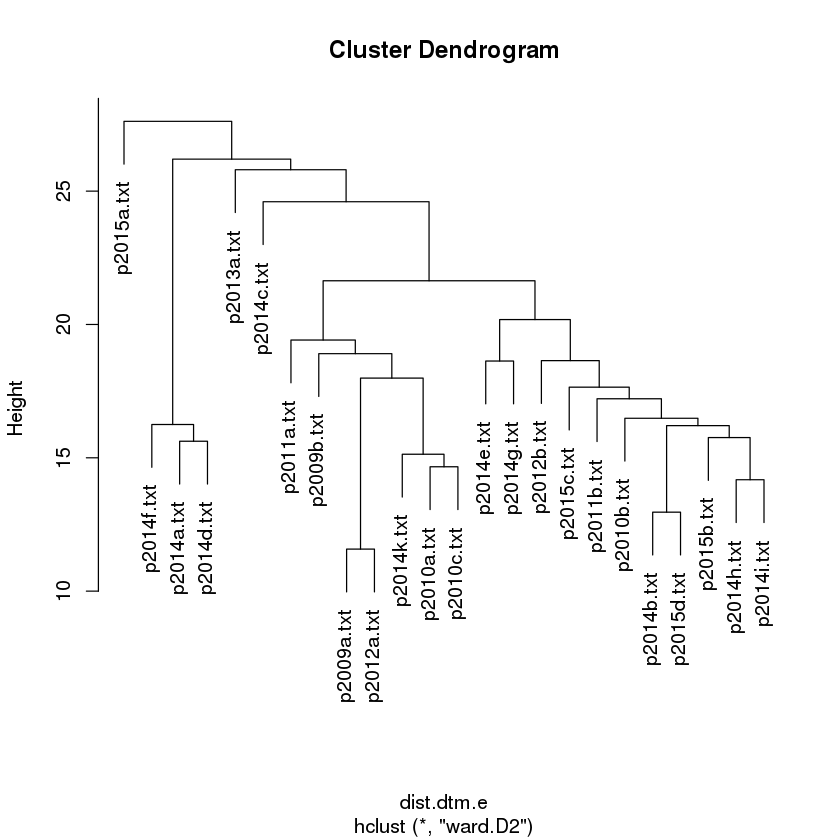

In [88]:
#Ward’s method 사용 군집분석을 실시함. 
myclusters <- hclust(dist.dtm.e,method="ward.D2")
#군집분석결과를 그래프로 그리면 아래와 같다.
plot(myclusters)

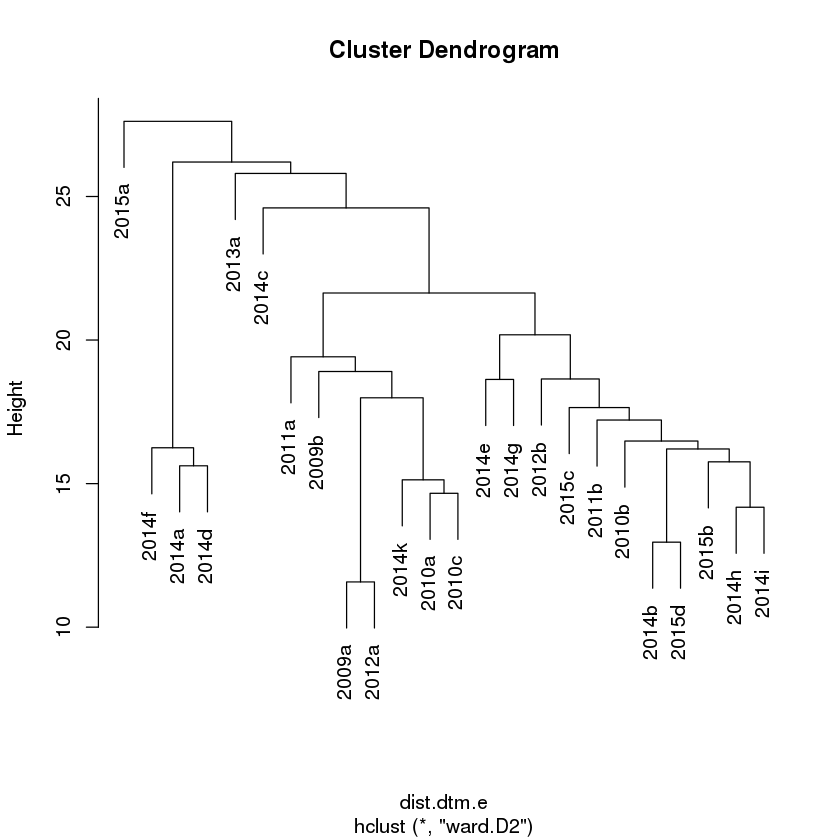

In [89]:
#라벨이 별로 보기 좋지 않다. 년도와 년도 뒤의 ab..만 두고 나머지 텍스트는 지우자. 
myclusters$labels <- str_extract(myclusters$labels, "[[:digit:]]{4}[[:alpha:]]{1}")
#군집분석결과를 그래프로 그리면 아래와 같다.
plot(myclusters)

In [90]:
#원하는 군집의 수는 다음과 같이 계산하면 된다. 만약 5개를 원한다면
mygroup <- cutree(myclusters,k=5)
mygroup
table(mygroup)

2009a 2009b 2010a 2010b 2010c 2011a 2011b 2012a 2012b 2013a 2014a 2014b 2014c 
    1     1     1     1     1     1     1     1     1     2     3     1     4 
2014d 2014e 2014f 2014g 2014h 2014i 2014k 2015a 2015b 2015c 2015d 
    3     1     3     1     1     1     1     5     1     1     1

mygroup
 1  2  3  4  5 
18  1  3  1  1 

In [91]:
#8개의 군집을 설정하자
mygroup <- cutree(myclusters,k=8)
table(mygroup)


mygroup
1 2 3 4 5 6 7 8 
6 9 1 1 3 1 2 1 


---------------------
Welcome to dendextend version 1.10.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------


Attaching package: ‘dendextend’

The following object is masked from ‘package:stats’:

    cutree



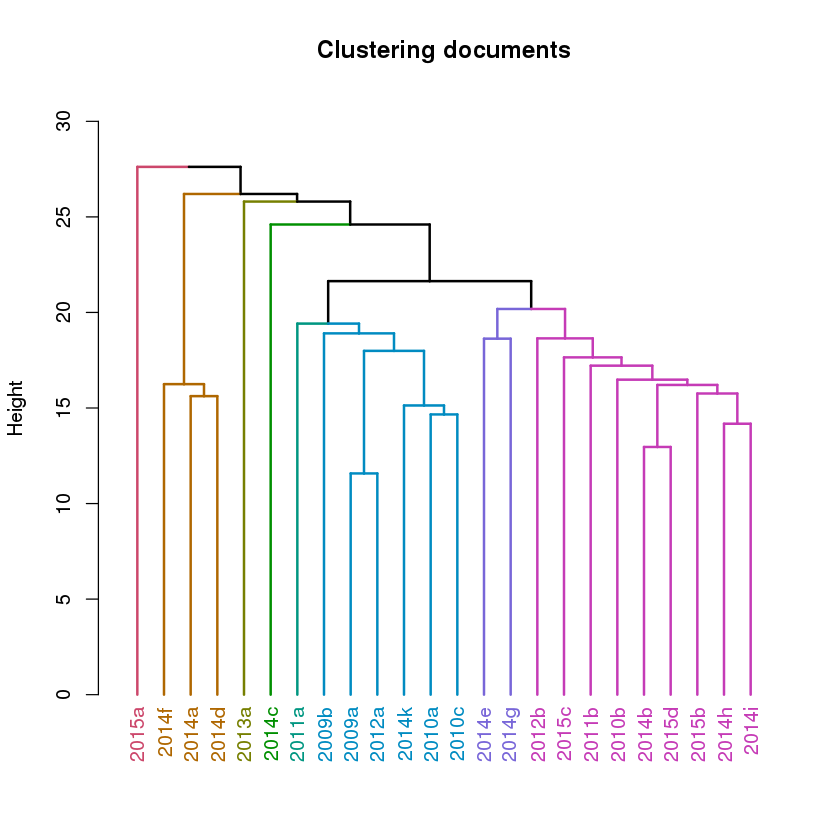

In [92]:
#만약 색조가 들어간 군집분석결과를 그래프로 그리면 다음과 같다. 
#우선은 dendextend 라이브러리를 구동해야 한다. 
library('dendextend')
#우선은 덴드로그램 그림을 저장한다. 
dend <- as.dendrogram(myclusters)
#몇 개의 집단을 선정할지를 결정하였다. 
myk <- 8
#덴드로그램의 선의 색깔을 다르게 설정하였다. 
dend <- dend %>%
  color_branches(k = myk) %>%
  color_labels(dend, k=myk) %>%
  set("branches_lwd", 2) %>%
  set("branches_lty", 1)
plot(dend,main="Clustering documents",ylab="Height",
     ylim=c(0,30))

In [93]:
#8개의 군집을 설정하고, 각 군집별로 출간년도의 빈도를 구해보자
mytable <- table(str_extract(myclusters$labels,"[[:digit:]]*"),
                 +                  cutree(myclusters,k=8))
mytable

      
       1 2 3 4 5 6 7 8
  2009 2 0 0 0 0 0 0 0
  2010 2 1 0 0 0 0 0 0
  2011 0 1 1 0 0 0 0 0
  2012 1 1 0 0 0 0 0 0
  2013 0 0 0 1 0 0 0 0
  2014 1 3 0 0 3 1 2 0
  2015 0 3 0 0 0 0 0 1


Attaching package: ‘ggplot2’

The following object is masked from ‘package:NLP’:

    annotate



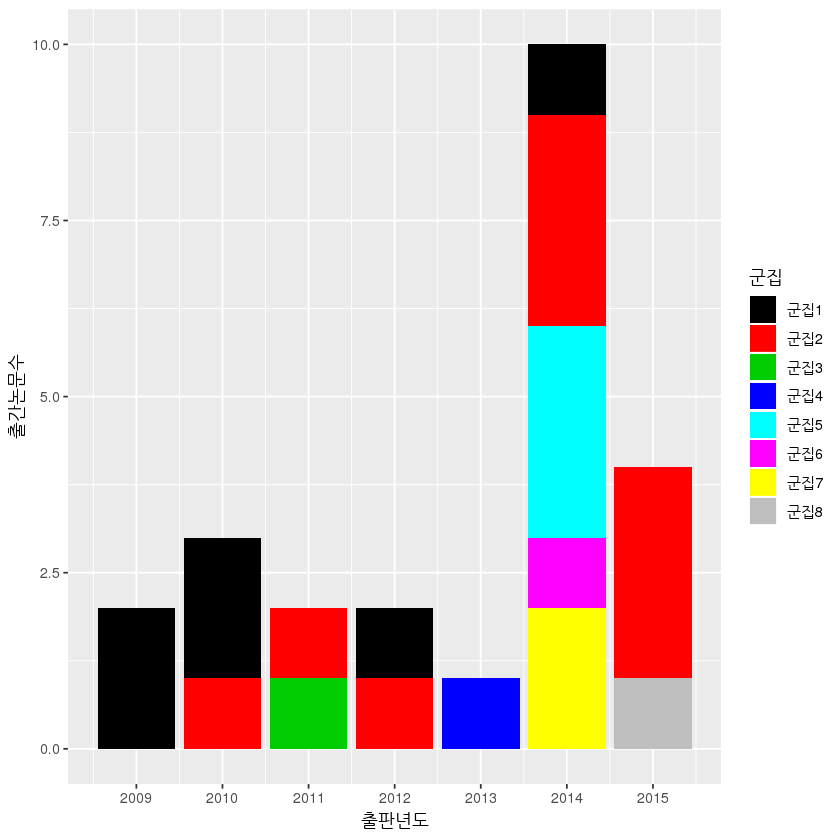

In [94]:
#위의 결과를 막대그래프로 그리면 보다 효율적이다. 
#사전준비작업을 합시다. 응용편을 참조하라. 
library('ggplot2')
cluster.by.year <- data.frame(mytable)
colnames(cluster.by.year) <- c('year','cluster','publish')
cluster.by.year$cluster <- paste('cluster',cluster.by.year$cluster,sep='')
cluster.by.year$year <- as.numeric(as.character(cluster.by.year$year))
#시간에 따른 변화를 살펴보자 
ggplot(data=cluster.by.year, aes(x=year, y=publish, fill=cluster)) + 
  geom_bar(stat="identity")+
  scale_x_continuous(breaks=2009:2015,labels=2009:2015)+
  scale_fill_manual(values=1:8,labels=paste('군집',1:8,sep=''))+
  labs(x="출판년도",y="출간논문수",fill='군집')

In [95]:
#한국어 학술논문 말뭉치에 대한 분석결과는 아래와 같다. 
#위에서 소개한 영문 학술논문 말뭉치에 대한 분석결과에서의 설명을 참조하라. 
dist.dtm.k <- dist(dtm.k)
myclusters <- hclust(dist.dtm.k,method="ward.D2")

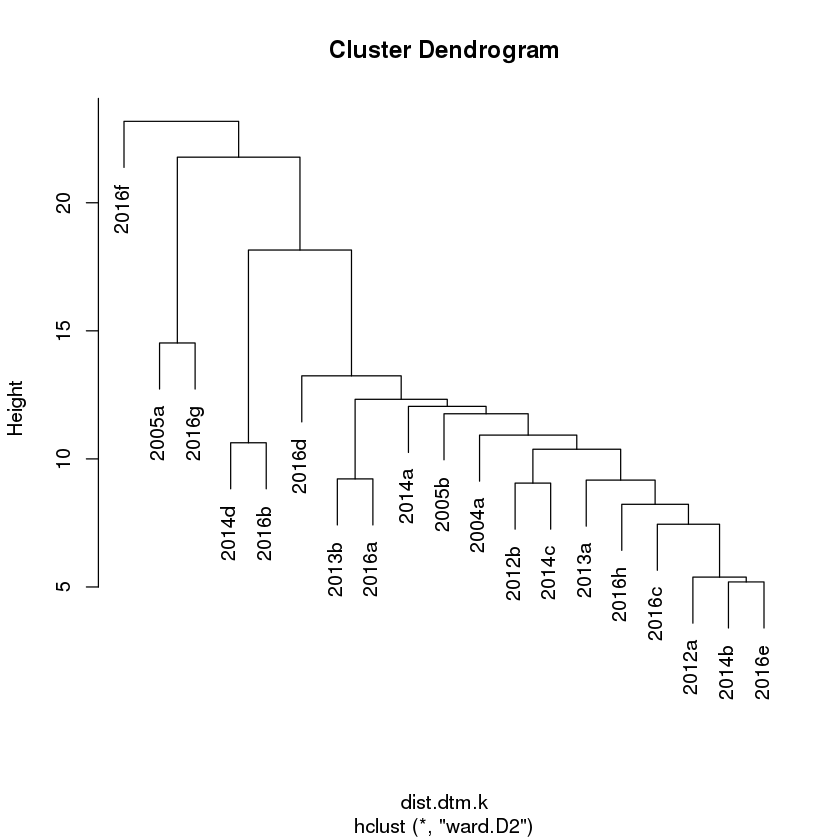

In [96]:
#년도와 년도 뒤의 ab..만 두고 나머지 텍스트는 지우자. 
myclusters$labels <- str_extract(myclusters$labels, "[[:digit:]]{4}[[:alpha:]]{1}")
#군집분석결과를 그래프로 그리면 아래와 같다.
plot(myclusters)

mygroup
 1  2  3  4  5 
14  1  2  1  1 

mygroup
 1  2  3  4  5  6  7  8 
10  1  2  1  2  1  1  1 

mygroup
 1  2  3  4  5  6  7  8  9 10 
 1  1  1  8  2  1  2  1  1  1 

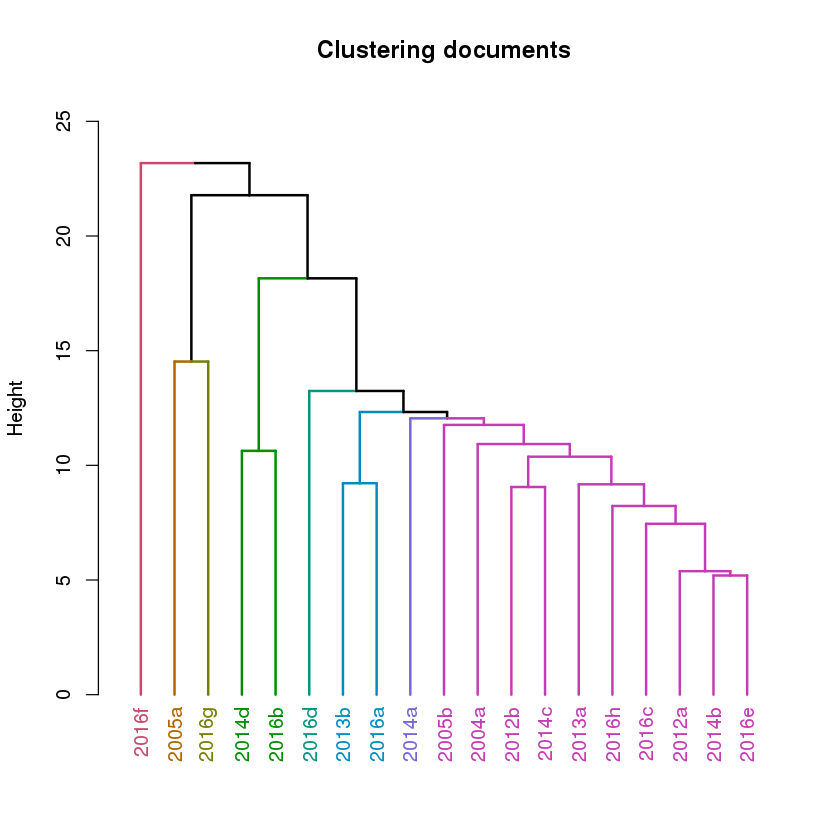

In [97]:
#군집의 수를 5로 정하거나 8, 심지어 10으로 정해도 군집이 잘 나누어지지는 못한다. 
#적어도 국문 학술논문 말뭉치를 구성하는 문서들을 적절하게 군집화하는 것은 쉽지 않다.
#여기서는 영어 학술논문 말뭉치에서 적용했던 8을 그대로 이용하자. 
mygroup <- cutree(myclusters,k=5)
table(mygroup)
mygroup <- cutree(myclusters,k=8)
table(mygroup)
mygroup <- cutree(myclusters,k=10)
table(mygroup)

dend <- as.dendrogram(myclusters)
myk <- 8
dend <- dend %>%
  color_branches(k = myk) %>%
  color_labels(dend, k=myk) %>%
  set("branches_lwd", 2) %>%
  set("branches_lty", 1)
plot(dend,main="Clustering documents",ylab="Height",
     ylim=c(0,25))

mytable <- table(str_extract(myclusters$labels,"[[:digit:]]*"),
                 cutree(myclusters,k=8))
cluster.by.year <- data.frame(mytable)
colnames(cluster.by.year) <- c('year','cluster','publish')
cluster.by.year$cluster <- paste('cluster',cluster.by.year$cluster,sep='')
cluster.by.year$year <- as.numeric(as.character(cluster.by.year$year))


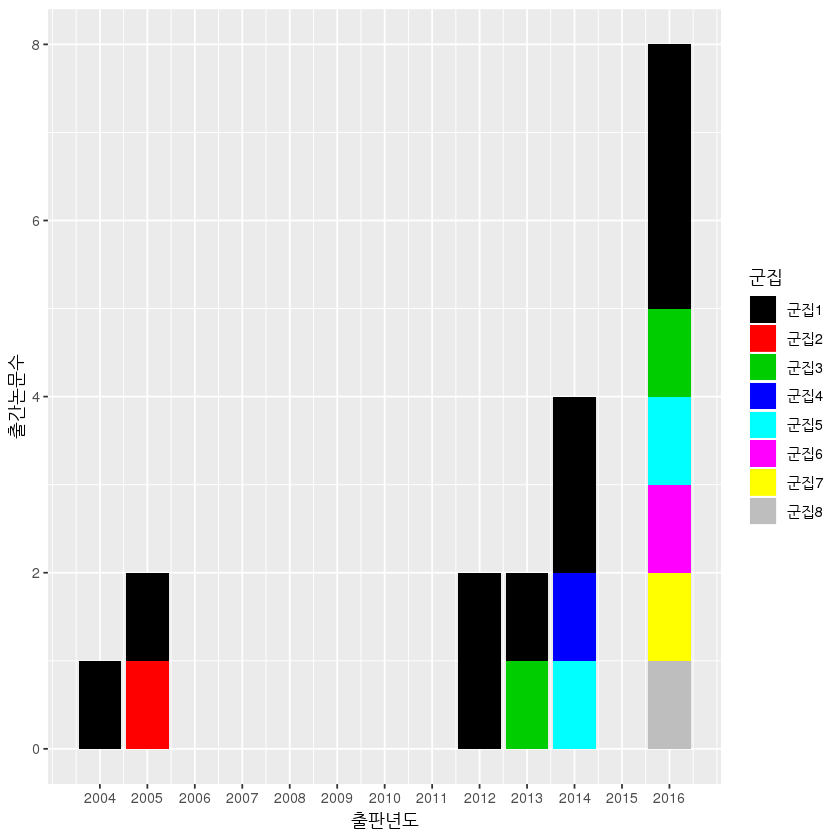

In [98]:
#시간에 따른 변화를 살펴보자 
ggplot(data=cluster.by.year, aes(x=year, y=publish, fill=cluster)) + 
  geom_bar(stat="identity")+
  scale_x_continuous(breaks=2004:2016,labels=2004:2016)+
  scale_y_continuous(breaks=2*(0:5),labels=2*(0:5))+
  scale_fill_manual(values=1:8,labels=paste('군집',1:8,sep=''))+
  labs(x="출판년도",y="출간논문수",fill='군집')